In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pickle
from sklearn import preprocessing
import cv2

In [0]:
path_come = '/content/drive/My Drive/DataMining/MLP'

x_train = pickle.load(open(path_come + '/data_emnist/x_train.pkl', 'rb'))
y_train = pickle.load(open(path_come + '/data_emnist/y_train.pkl', 'rb'))
x_test = pickle.load(open(path_come + '/data_emnist/x_test.pkl', 'rb'))
y_test = pickle.load(open(path_come + '/data_emnist/y_test.pkl', 'rb'))

U


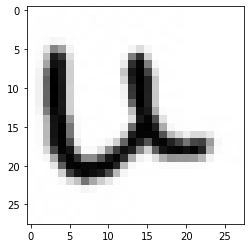

In [43]:
image_index = random.randint(0, 30000)
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [44]:
x_train.shape

(348687, 28, 28)

In [45]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
le.classes_

array(['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')


Xóa các dữ liệu không nằm trong phạm vi bài toán ['#', '$', '&', '@']

In [46]:
temp1 = np.where((y_train == '#') | (y_train == '$') | (y_train == '&') | (y_train == '@'))
y_train = np.delete(y_train, temp1[0])
x_train = np.delete(x_train, temp1[0], axis = 0)

temp2 = np.where((y_test == '#') | (y_test == '$') | (y_test == '&') | (y_test == '@'))
y_test = np.delete(y_test, temp2[0])
x_test = np.delete(x_test, temp2[0], axis = 0)

x_train.shape

(308683, 28, 28)

In [47]:
le.fit(y_train)
le.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [0]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [49]:
y_train

array([ 1, 24,  7, ..., 25, 18,  9])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [0]:
Y_train = np_utils.to_categorical(y_train, 35)
Y_test = np_utils.to_categorical(y_test, 35)

In [53]:
Y_train.shape

(308683, 35)

In [0]:
from sklearn.model_selection import train_test_split
X, X_val, Y, Y_val = train_test_split(x_train, Y_train, test_size=0.3, random_state=24)

In [55]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [56]:
H = model.fit(X, Y, validation_data = (X_val, Y_val) , batch_size = 32, epochs = 10)
model.save(path_come + '/model.hdf5')

Epoch 1/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.4622 - accuracy: 0.8515 - val_loss: 0.2527 - val_accuracy: 0.9115
Epoch 2/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.2916 - accuracy: 0.9028 - val_loss: 0.2263 - val_accuracy: 0.9220
Epoch 3/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.2626 - accuracy: 0.9107 - val_loss: 0.2135 - val_accuracy: 0.9251
Epoch 4/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.2475 - accuracy: 0.9143 - val_loss: 0.2143 - val_accuracy: 0.9253
Epoch 5/10
6753/6753 [==============================] - 39s 6ms/step - loss: 0.2378 - accuracy: 0.9181 - val_loss: 0.2086 - val_accuracy: 0.9282
Epoch 6/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.2321 - accuracy: 0.9188 - val_loss: 0.2137 - val_accuracy: 0.9263
Epoch 7/10
6753/6753 [==============================] - 38s 6ms/step - loss: 0.2280 - accuracy: 0.9206 - val_loss: 0.2165 - val_ac

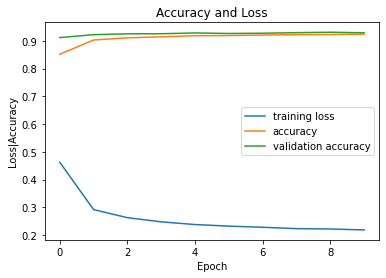

In [57]:
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [0]:
model.load_weights(path_come + '/model.hdf5')

In [59]:
model.evaluate(x_test, Y_test)

566/566 [==============================] - 2s 3ms/step - loss: 0.2230 - accuracy: 0.9280


[0.2229585498571396, 0.9279717206954956]

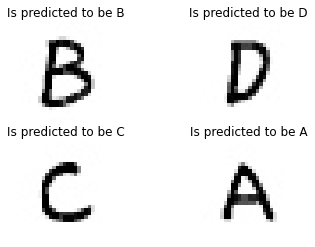

In [79]:
import os
import glob

test_path = os.path.join(path_come, '*g') 
files = glob.glob(test_path)

i = 0
for f1 in files:
    img = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap='Greys')
    plt.axis('off')
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    x = model.predict(img)
    y = np.where(x==1)
    ax.title.set_text('Is predicted to be ' + le.classes_[y[1][0]])
    i +=1
    # print('file \'' + os.path.basename(f1) + '\' is predicted to be ' + le.classes_[y[1][0]])